In [ ]:


!unzip /content/Bones-data.zip

Archive:  /content/Bones-data.zip
   creating: Bones-data/
   creating: Bones-data/test/
   creating: Bones-data/test/Oblique fracture/
  inflating: Bones-data/test/Oblique fracture/0-_gallery_jpeg.rf.b3170266ea6b6d03bfb4ae5991df98ce.jpg  
  inflating: Bones-data/test/Oblique fracture/10-1055-b-002-85516_c023_f003-1_jpg.rf.a2cb46deb0263fc9290f45ee328c632.jpg  
  inflating: Bones-data/test/Oblique fracture/10-1055-b-002-85516_c023_f003-1_jpg.rf.a2cb46deb0263fc92980f45ee328c632.jpg  
  inflating: Bones-data/test/Oblique fracture/1000_F_264769365_u927dRxrrx1fi4rlR1VWif9LcGeJwv4h_jpg.rf.b2d149cb90da63cbc49ec73e82bf0935.jpg  
  inflating: Bones-data/test/Oblique fracture/119913828-radiography-with-oblique-fibula-fracture_jpg.rf.8f0f4e48c3c959ca7b930e3cba8fafd0.jpg  
  inflating: Bones-data/test/Oblique fracture/220px-MalletFinger-PNG_jpg.rf.8eb8b19e344b2ab4d48b4cbeda7b4a80.jpg  
  inflating: Bones-data/test/Oblique fracture/2624240dc461d0c5d2d7fb7e16b3065c_jpg.rf.628b0bc8b7bb91626b4835d7b36

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:

size = [224, 224] + [3]
size

[224, 224, 3]

In [ ]:
train_path = '/content/Bones-data/train'
valid_path = '/content/Bones-data/test'

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [ ]:

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3],  weights='imagenet', include_top=False)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
for layer in vgg16.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:

vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:

folders = glob('/content/Bones-data/train/*')
folders

['/content/Bones-data/train/Spiral Fracture',
 '/content/Bones-data/train/Oblique fracture']

In [ ]:
num_of_class = len(folders)
num_of_class

2

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(num_of_class,activation='softmax'))

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 143 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.5699 - loss: 3.1237 - val_accuracy: 0.4286 - val_loss: 1.7116
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - accuracy: 0.6839 - loss: 0.9115 - val_accuracy: 0.6429 - val_loss: 1.0056
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - accuracy: 0.6976 - loss: 0.8004 - val_accuracy: 0.5000 - val_loss: 0.9563
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 525ms/step - accuracy: 0.8319 - loss: 0.3591 - val_accuracy: 0.5357 - val_loss: 0.9816
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - accuracy: 0.8047 - loss: 0.4211 - val_accuracy: 0.6071 - val_loss: 0.8417
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.8859 - loss: 0.3167 - val_accuracy: 0.5714 - val_loss: 0.8997
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 0.9294 - loss: 0.2343 - val_accuracy: 0.6429 - val_loss: 1.1793
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 0.9065 - loss: 0.1860 - val_accuracy: 0.6071 - val_loss: 0

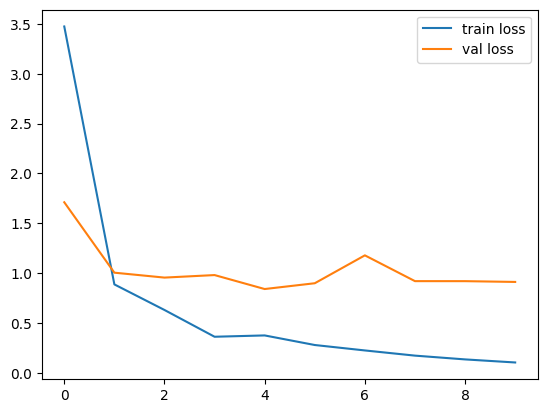

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

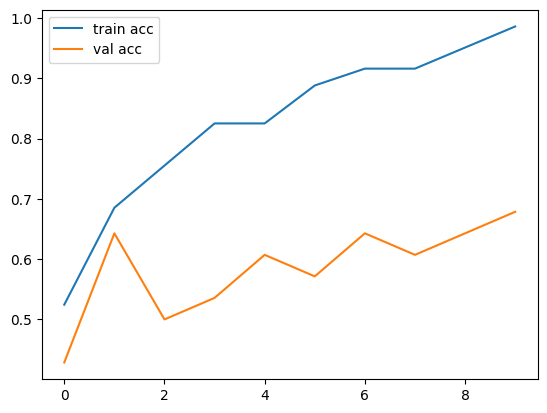

<Figure size 640x480 with 0 Axes>

In [ ]:

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

model.evaluate(test_set)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6786 - loss: 0.9129


[0.9128533005714417, 0.6785714030265808]

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:

from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
model = load_model("model_vgg16.h5")

In [ ]:

from tensorflow.keras.preprocessing import image

In [ ]:
img = "/content/Bones-data/test/Oblique fracture/10-1055-b-002-85516_c023_f003-1_jpg.rf.a2cb46deb0263fc92980f45ee328c632.jpg"

In [ ]:
img=image.load_img(img,target_size=(224,224))

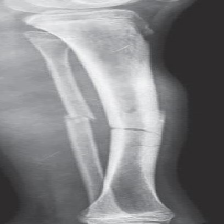

In [ ]:
img


In [ ]:
x=image.img_to_array(img)
x

array([[[179., 180., 182.],
        [180., 181., 183.],
        [184., 185., 187.],
        ...,
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.]],

       [[181., 182., 184.],
        [184., 185., 187.],
        [188., 189., 191.],
        ...,
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.]],

       [[183., 184., 186.],
        [187., 188., 190.],
        [192., 193., 195.],
        ...,
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.]],

       ...,

       [[ 46.,  44.,  45.],
        [ 44.,  42.,  43.],
        [ 44.,  42.,  43.],
        ...,
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.]],

       [[ 45.,  43.,  44.],
        [ 45.,  43.,  44.],
        [ 45.,  43.,  44.],
        ...,
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.],
        [ 46.,  44.,  45.]],

       [[ 45.,  43.,  44.],
        [ 46.,  44.,  45.],
        [ 46.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
z = plt.imread("/content/Bones-data/test/Oblique fracture/10-1055-b-002-85516_c023_f003-1_jpg.rf.a2cb46deb0263fc92980f45ee328c632.jpg")

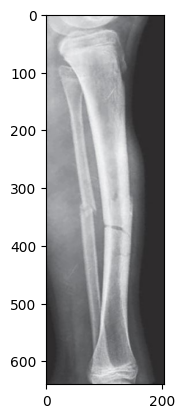

In [ ]:
plt.imshow(z)

In [ ]:
z.shape

(640, 204, 3)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/225

In [ ]:
from keras.applications.vgg16 import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [ ]:

output = model.predict(img_data)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.03185581, 0.9681442 ]], dtype=float32)

In [ ]:

result = np.argmax(output, axis=1)
result

array([1])

In [ ]:
if result[0] == 0:
    prediction = 'Oblique fracture'
    print(prediction)
else:
    prediction = 'Spiral Fracture'
    print(prediction)

Spiral Fracture
